<a href="https://colab.research.google.com/github/angelamejia804/TimeSeries/blob/main/Preparacion_TimeSeries_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import numpy as np
import pandas as pd
import pylab as pl
import warnings
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from matplotlib.colors import Normalize
from time import time
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


mpl.rcParams['figure.figsize'] = (11, 4)
mpl.rcParams['axes.grid'] = False

import statsmodels.api as sm

plt.style.use('fivethirtyeight')

In [172]:
from google.colab import files
uploaded = files.upload()

Saving data_DGMB (3).csv to data_DGMB (3) (5).csv


In [366]:
df = pd.read_csv("data_DGMB (3).csv", delimiter=';')

De forma preliminar Se selecciona el año 2021 y 2022, se deja 2020 por fuera del analisis por tratarse de un año con condiciones Atipicas y 2023 que aun no esta completo, en los modelos a implementar se hacen diferentes pruebas para valdiar el comportamiento dejando este año y quitando para hacer la evaluación compleeta

Se hace una validación para identificar datos fantes del mes de octubre del 2022 ya que en la grafica se evidencia una caida atipica de las temperaturas debido a datos faltantes

In [367]:
df_gd_final=df[['Total DegreeDay','YYYYWWMarketing']]  # se crea un nuevo DF desde el original para el rango de tiempo seleccionado **** con el df original

darle formato a los grados

In [368]:
df_gd_final['Total DegreeDay'].dtype

dtype('O')

In [369]:
df_gd_final['Total DegreeDay'] = df_gd_final['Total DegreeDay'].str.replace(',', '.').astype(float)

<ipython-input-369-c83777f72600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gd_final['Total DegreeDay'] = df_gd_final['Total DegreeDay'].str.replace(',', '.').astype(float)


In [370]:
#df_gd_final['Total DegreeDay'] = df_gd_final.to_numeric(df['Total DegreeDay'])

In [371]:
df_gd_final['YYYYWWMarketing'] = df_gd_final['YYYYWWMarketing'].apply(str)

<ipython-input-371-1ece4e3e7a04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gd_final['YYYYWWMarketing'] = df_gd_final['YYYYWWMarketing'].apply(str)


In [372]:
df_gd_final.dtypes

Total DegreeDay    float64
YYYYWWMarketing     object
dtype: object

Usamos la funcion rename para darles nuevos nombres a las columnas seleccionadas

In [373]:
df_gd_final = df_gd_final.rename(columns={'YYYYWWMarketing':'Semana',
                                   'Total DegreeDay':'Grados_dia'})
#Renombramos las columnas del DF

In [374]:
df_gd_final

,Grados_dia,Semana
0,NaN,202001
1,NaN,202001
2,NaN,202001
3,9.83,202001
4,9.87,202001
...,...,...
1166,9.20,202310
1167,10.41,202310
1168,8.75,202310
1169,9.59,202311


In [375]:
df_gd_final = df_gd_final.set_index('Semana') 

nuevo DF le hacemos un indice por la semana, ya que las demás bases se encuentra a esta granularidad y se crea el indice para unirse con las demas fuentes

In [377]:
#df_gd_final=df_gd_final.groupby('Semana').sum() # en caso de tener mas de un valor de temperatura x fecha las suma

In [378]:
df_gd_final

,Grados_dia
Semana,
202001,NaN
202001,NaN
202001,NaN
202001,9.83
202001,9.87
...,...
202310,9.20
202310,10.41
202310,8.75


#como trabajar con los faltantes?
usamos libreria Sklearn para llenar los faltantes, de acuerdo con el analisis de la fase 1, y los reusltaods optenidos se elige imputar con la media

In [379]:
#como trabajar con los faltantes?
from sklearn.impute import SimpleImputer
#probamos con una libreria aprendida en ML para imputar datos
imputer = SimpleImputer(strategy='mean')# parametro=median, mean
imputer=imputer.fit(df_gd_final[['Grados_dia']])
df_gd_final['Grados_dia']=imputer.transform(df_gd_final[['Grados_dia']])

In [380]:
df_gd_final

,Grados_dia
Semana,
202001,9.628154
202001,9.628154
202001,9.628154
202001,9.830000
202001,9.870000
...,...
202310,9.200000
202310,10.410000
202310,8.750000


In [381]:
df_gd_final=df_gd_final.loc['202001':'202253'] #desde el df original para el rango de tiempo seleccionado

In [382]:
df_gd_final #1099

,Grados_dia
Semana,
202001,9.628154
202001,9.628154
202001,9.628154
202001,9.830000
202001,9.870000
...,...
202252,8.680000
202252,10.000000
202252,10.580000


Transformamos el df en una array para generar nuevas medidas

In [ ]:
#f_gd_final=df_gd_final.loc['202001':'202312'] #desde el df original para el rango de tiempo seleccionado

In [383]:
matriz_gd=df_gd_final.to_numpy()#convertimos el DF en un arreglo NP

In [384]:
matriz=matriz_gd.reshape(-1,7) #hacemos una matriz para organiza la pemperatura x cada 7 dias

In [385]:
matriz

array([[ 9.62815358,  9.62815358,  9.62815358, ...,  9.87      ,
        10.29      ,  9.61      ],
       [10.94      , 10.43      ,  9.68      , ...,  9.39      ,
        10.26      , 10.66      ],
       [11.42      , 11.05      , 10.25      , ..., 10.74      ,
        11.8       , 11.85      ],
       ...,
       [ 9.55      ,  8.71      ,  9.05      , ...,  9.02      ,
         8.75      ,  9.41      ],
       [ 8.96      ,  9.5       ,  8.95      , ..., 10.17      ,
         9.94      ,  9.95      ],
       [10.5       , 10.06      ,  8.68      , ..., 10.58      ,
        10.11      ,  9.97      ]])

In [386]:
df_gd_final.isnull().sum(axis=1)

Semana
202001    0
202001    0
202001    0
202001    0
202001    0
         ..
202252    0
202252    0
202252    0
202252    0
202252    0
Length: 1099, dtype: int64

hago un nuevo df para las columnas de interes


In [387]:
df_semana=df_gd_final.groupby('Semana').apply(sum) #se acumulan los GD por semana en un nuevo DF, de aca se tomara el indice para devolver el arreglo NP a un DF indexado

In [388]:
df_semana

,Grados_dia
Semana,
202001,68.484461
202002,70.690000
202003,77.380000
202004,74.620000
202005,67.420000
...,...
202248,69.090000
202249,65.420000
202250,62.840000


con el DF que hicimos por semana, podemos pintar unas graficas que nos muestren el compotamiento por semanas para los dos años seleccionados

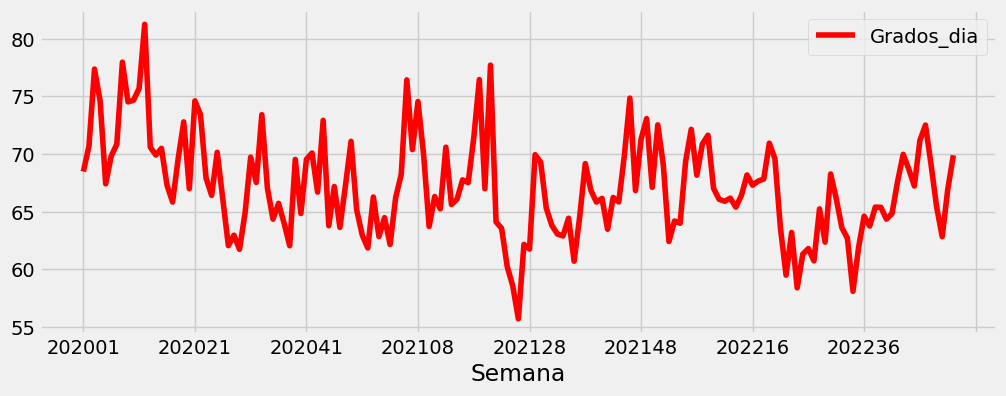

In [389]:
df_semana.plot(kind='line',y='Grados_dia',color='red')
plt.show()

In [390]:
df_semana.describe(include='all')

,Grados_dia
count,157.000000
mean,67.208521
std,4.364040
min,55.710000
25%,64.120000
50%,66.870000
75%,69.920000
max,81.260000


In [391]:
print(df_gd_final.index.min())#valor minimo del indice de semanas
print(df_gd_final.index.max())#valor maximo del indice por semanas

202001
202252


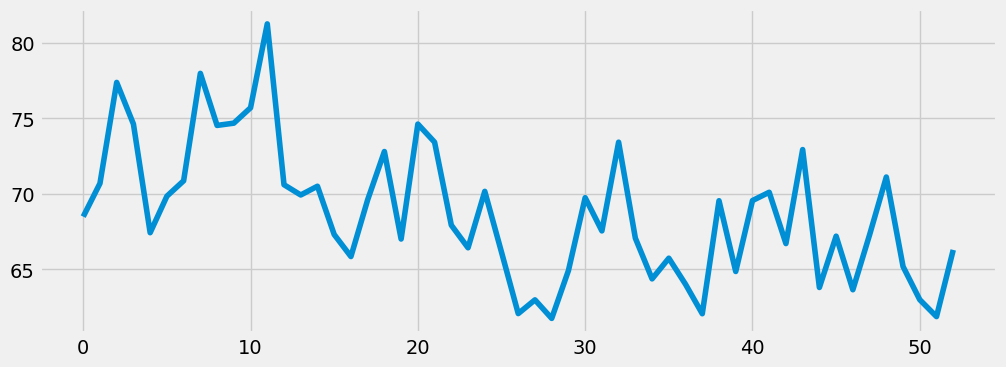

In [394]:
df_gd_2020 = df_semana.loc['202001':'202053']
plt.plot(df_gd_2020.values)

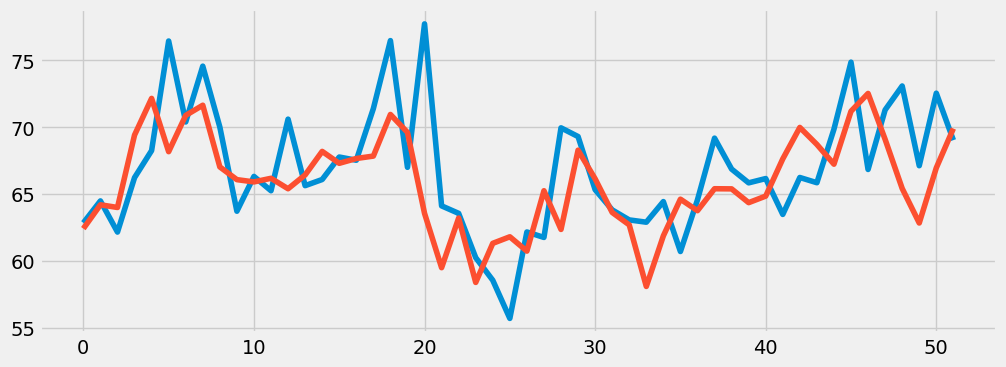

In [395]:
#En este grafico podemos comparar el comportamiento de cada semana  x años (2021 y 2022)
df_gd_2021 = df_semana.loc['202101':'202153']
plt.plot(df_gd_2021.values)
df_gd_2022 = df_semana.loc['202201':'202253']
plt.plot(df_gd_2022.values)

In [396]:
indice = df_semana.index #sacamos unicamente el indice del DF de grados día por semana

En este paso unimos el indice del DF de grados día por semanas con el arreglo de temperaturas de cada día para finalmente volerlo un DF con las temperaturas de los siete dias 

In [406]:
df_gd_final=pd.DataFrame(matriz, index=indice)  

Se hace una validación preliminar de datos faltantes

In [407]:
df_gd_final

,0,1,2,3,4,5,6
Semana,,,,,,,
202001,9.628154,9.628154,9.628154,9.83,9.87,10.29,9.61
202002,10.940000,10.430000,9.680000,9.33,9.39,10.26,10.66
202003,11.420000,11.050000,10.250000,10.27,10.74,11.80,11.85
202004,11.660000,10.510000,10.090000,10.54,11.84,10.57,9.41
202005,9.060000,9.520000,10.060000,9.86,10.06,10.78,8.08
...,...,...,...,...,...,...,...
202248,9.210000,9.590000,10.270000,9.79,10.34,10.26,9.63
202249,9.320000,8.710000,9.470000,9.14,10.15,9.78,8.85
202250,9.550000,8.710000,9.050000,8.35,9.02,8.75,9.41


y el resultado mas importante es el DF con las temperaturas por día e indexadas por semana

In [408]:
df_gd_final = df_gd_final.rename(columns={0:'GD_Domingo',1:'GD_Lunes',2:'GD_Martes',3:'GD_Miercoles',4:'GD_Jueves',5:'GD_Viernes',6:'GD_Sabado'
                                   })
#Renombramos las columnas del DF

In [409]:
df_gd_final

,GD_Domingo,GD_Lunes,GD_Martes,GD_Miercoles,GD_Jueves,GD_Viernes,GD_Sabado
Semana,,,,,,,
202001,9.628154,9.628154,9.628154,9.83,9.87,10.29,9.61
202002,10.940000,10.430000,9.680000,9.33,9.39,10.26,10.66
202003,11.420000,11.050000,10.250000,10.27,10.74,11.80,11.85
202004,11.660000,10.510000,10.090000,10.54,11.84,10.57,9.41
202005,9.060000,9.520000,10.060000,9.86,10.06,10.78,8.08
...,...,...,...,...,...,...,...
202248,9.210000,9.590000,10.270000,9.79,10.34,10.26,9.63
202249,9.320000,8.710000,9.470000,9.14,10.15,9.78,8.85
202250,9.550000,8.710000,9.050000,8.35,9.02,8.75,9.41


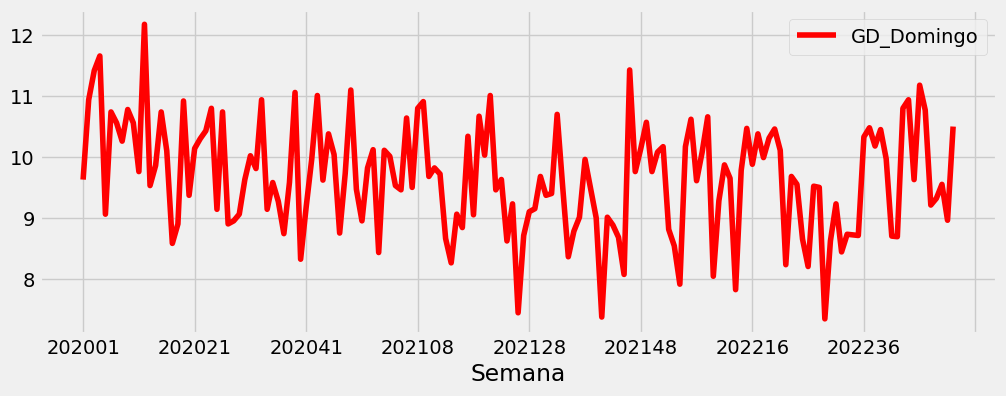

In [413]:
df_gd_final.plot(kind='line',y='GD_Domingo',color='red')
#df_gd_final.plot(kind='line',y='GD_Lunes',color='green')
#df_gd_final.plot(kind='line',y='GD_Martes',color='yellow')
#df_gd_final.plot(kind='line',y='GD_Miercoles',color='pink')
#df_gd_final.plot(kind='line',y='GD_Jueves',color='blue')
#df_gd_final.plot(kind='line',y='GD_Viernes',color='orange')
#df_gd_final.plot(kind='line',y='GD_Sabado',color='red')
plt.show()

GEnreamos nuevas variables a partir de la analitica descriptiva del DF 

In [414]:
df_gd_variables=df_gd_final.apply(lambda x: x.describe(), axis=1)

In [415]:
df_gd_variables

,count,mean,std,min,25%,50%,75%,max
Semana,,,,,,,,
202001,7.0,9.783494,0.247887,9.61,9.628154,9.628154,9.850,10.29
202002,7.0,10.098571,0.636014,9.33,9.535000,10.260000,10.545,10.94
202003,7.0,11.054286,0.668801,10.25,10.505000,11.050000,11.610,11.85
202004,7.0,10.660000,0.848999,9.41,10.300000,10.540000,11.115,11.84
202005,7.0,9.631429,0.864551,8.08,9.290000,9.860000,10.060,10.78
...,...,...,...,...,...,...,...,...
202248,7.0,9.870000,0.430310,9.21,9.610000,9.790000,10.265,10.34
202249,7.0,9.345714,0.507243,8.71,8.995000,9.320000,9.625,10.15
202250,7.0,8.977143,0.416122,8.35,8.730000,9.020000,9.230,9.55


<Axes: title={'center': 'Promedio diario de la semana'}, xlabel='Semana'>

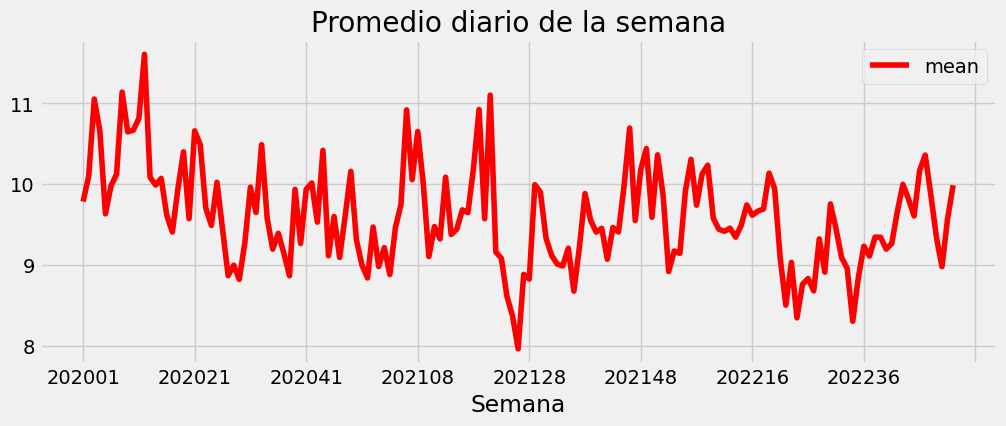

In [424]:
df_gd_variables.plot(kind='line',y='mean',color='red', title='Promedio diario de la semana')

In [425]:
df_gd_variables=df_gd_variables.drop(['count'], axis=1)

In [427]:
#df_semana ## grados acumulados

In [428]:
#unir los GD acumulados + la información estadistica de GD
merged_inner = pd.merge(left=df_gd_variables,right=df_semana, left_on='Semana', right_on='Semana')

In [429]:
merged_inner

,mean,std,min,25%,50%,75%,max,Grados_dia
Semana,,,,,,,,
202001,9.783494,0.247887,9.61,9.628154,9.628154,9.850,10.29,68.484461
202002,10.098571,0.636014,9.33,9.535000,10.260000,10.545,10.94,70.690000
202003,11.054286,0.668801,10.25,10.505000,11.050000,11.610,11.85,77.380000
202004,10.660000,0.848999,9.41,10.300000,10.540000,11.115,11.84,74.620000
202005,9.631429,0.864551,8.08,9.290000,9.860000,10.060,10.78,67.420000
...,...,...,...,...,...,...,...,...
202248,9.870000,0.430310,9.21,9.610000,9.790000,10.265,10.34,69.090000
202249,9.345714,0.507243,8.71,8.995000,9.320000,9.625,10.15,65.420000
202250,8.977143,0.416122,8.35,8.730000,9.020000,9.230,9.55,62.840000


In [430]:
df_gd_t = merged_inner.reset_index() #df_gd_t.head()

In [431]:
df_gd_t

,Semana,mean,std,min,25%,50%,75%,max,Grados_dia
0,202001,9.783494,0.247887,9.61,9.628154,9.628154,9.850,10.29,68.484461
1,202002,10.098571,0.636014,9.33,9.535000,10.260000,10.545,10.94,70.690000
2,202003,11.054286,0.668801,10.25,10.505000,11.050000,11.610,11.85,77.380000
3,202004,10.660000,0.848999,9.41,10.300000,10.540000,11.115,11.84,74.620000
4,202005,9.631429,0.864551,8.08,9.290000,9.860000,10.060,10.78,67.420000
...,...,...,...,...,...,...,...,...,...
152,202248,9.870000,0.430310,9.21,9.610000,9.790000,10.265,10.34,69.090000
153,202249,9.345714,0.507243,8.71,8.995000,9.320000,9.625,10.15,65.420000
154,202250,8.977143,0.416122,8.35,8.730000,9.020000,9.230,9.55,62.840000
155,202251,9.565714,0.484591,8.95,9.225000,9.500000,9.945,10.17,66.960000


Vamos a marcar las semana que sabemos que son de temporadas valentino y madres


In [434]:
df_gd_t['temporada'] = None

In [445]:
df_gd_t

,Semana,mean,std,min,25%,50%,75%,max,Grados_dia,temporada
0,202001,9.783494,0.247887,9.61,9.628154,9.628154,9.850,10.29,68.484461,False
1,202002,10.098571,0.636014,9.33,9.535000,10.260000,10.545,10.94,70.690000,False
2,202003,11.054286,0.668801,10.25,10.505000,11.050000,11.610,11.85,77.380000,True
3,202004,10.660000,0.848999,9.41,10.300000,10.540000,11.115,11.84,74.620000,True
4,202005,9.631429,0.864551,8.08,9.290000,9.860000,10.060,10.78,67.420000,False
...,...,...,...,...,...,...,...,...,...,...
152,202248,9.870000,0.430310,9.21,9.610000,9.790000,10.265,10.34,69.090000,False
153,202249,9.345714,0.507243,8.71,8.995000,9.320000,9.625,10.15,65.420000,False
154,202250,8.977143,0.416122,8.35,8.730000,9.020000,9.230,9.55,62.840000,False
155,202251,9.565714,0.484591,8.95,9.225000,9.500000,9.945,10.17,66.960000,False


In [436]:
df_gd_t['temporada'].dtype

dtype('O')

In [437]:
df_gd_t['temporada'] = df_gd_t['temporada'].astype('bool')


In [444]:
#marcar las semans de temporada de 2020
df_gd_t.loc[df_gd_t.Semana == '202003', 'temporada'] = True
df_gd_t.loc[df_gd_t.Semana == '202004', 'temporada'] = True
df_gd_t.loc[df_gd_t.Semana == '202016', 'temporada'] = True
df_gd_t.loc[df_gd_t.Semana == '202017', 'temporada'] = True

#marcar las semans de temporada de 2021
df_gd_t.loc[df_gd_t.Semana == '202103', 'temporada'] = True
df_gd_t.loc[df_gd_t.Semana == '202104', 'temporada'] = True
df_gd_t.loc[df_gd_t.Semana == '202116', 'temporada'] = True
df_gd_t.loc[df_gd_t.Semana == '202117', 'temporada'] = True
#marcar las semans de temporada de 2022
df_gd_t.loc[df_gd_t.Semana == '202203', 'temporada'] = True
df_gd_t.loc[df_gd_t.Semana == '202204', 'temporada'] = True
df_gd_t.loc[df_gd_t.Semana == '202216', 'temporada'] = True
df_gd_t.loc[df_gd_t.Semana == '202217', 'temporada'] = True

Por ultimo dejamos la semana con el formato de fecha (yyyy-w)\

In [446]:
df_gd_t['Semana'] = pd.to_datetime(df_gd_t['Semana'] + '1', format='%Y%U%w').dt.strftime('%Y-W%U')

In [447]:
df_gd_t

,Semana,mean,std,min,25%,50%,75%,max,Grados_dia,temporada
0,2020-W01,9.783494,0.247887,9.61,9.628154,9.628154,9.850,10.29,68.484461,False
1,2020-W02,10.098571,0.636014,9.33,9.535000,10.260000,10.545,10.94,70.690000,False
2,2020-W03,11.054286,0.668801,10.25,10.505000,11.050000,11.610,11.85,77.380000,True
3,2020-W04,10.660000,0.848999,9.41,10.300000,10.540000,11.115,11.84,74.620000,True
4,2020-W05,9.631429,0.864551,8.08,9.290000,9.860000,10.060,10.78,67.420000,False
...,...,...,...,...,...,...,...,...,...,...
152,2022-W48,9.870000,0.430310,9.21,9.610000,9.790000,10.265,10.34,69.090000,False
153,2022-W49,9.345714,0.507243,8.71,8.995000,9.320000,9.625,10.15,65.420000,False
154,2022-W50,8.977143,0.416122,8.35,8.730000,9.020000,9.230,9.55,62.840000,False
155,2022-W51,9.565714,0.484591,8.95,9.225000,9.500000,9.945,10.17,66.960000,False


guardamso en un archivo para usar en el modelo sarimax como viariables exogenas y probar el rendimiento del modelo con estas variables

In [449]:
df_gd_t.to_csv('df_gd_t.csv',sep= ";", header=True, index=True)